---
title: "CPPEvolution"
author: "Rodrigo Bonifácio et al."
date: "6/4/2021"
output: html_document
---

In [1]:
# version
# install.packages("sqldf", dependencies = TRUE)
# install.packages("stringr", dependencies = TRUE)
# install.packages("reshape2", dependencies = TRUE)
# install.packages("ggplot2", dependencies = TRUE)
# install.packages("lubridate", dependencies = TRUE)
# install.packages("lattice", dependencies = TRUE)

In [2]:
knitr::opts_chunk$set(echo = TRUE)
library(sqldf)
library(stringr)
library(reshape2)
library(ggplot2)
library(lubridate)
library(lattice)
library(dplyr)
setwd(".")

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
## Load the KCalc dataset

# "lambda"              "auto"               
# "range_for"           "const_expr"          "if_with_initializer"

ds <- read.csv("all-results.csv", head=T, sep=",")

ds$date <- as.Date(ds$date)

projects <- sqldf("select project, 
                          min(date) as first_revision, 
                          max(date) as last_revision, 
                          count(revision) as commits
                    from ds
                    group by project", method = "name__class")
projects

project,first_revision,last_revision,commits
<chr>,<dbl>,<dbl>,<int>
akonadi,14610,19130,527
akregator,14612,19127,437
amarok,14611,19127,398
amor,14621,19071,81
ark,14611,19127,395
bluedevil,14659,19127,339
calligra,14610,19131,540
choqok,14611,19127,294
discover,14778,19125,507


png 
  2

feature,Mean,Max,Min,Median,Std
<fct>,<dbl>,<int>,<int>,<int>,<dbl>
lambda,72.52525,897,0,11,155.6026
auto,272.04040,4416,0,49,595.5355
range_for,135.06061,1715,0,38,258.9153


feature,sum(total)
<fct>,<int>
async,0
auto,26932
const_expr,654
future_declarations,0
if_with_initializer,65
lambda,7180
promise_declarations,0
range_for,13371
shared_future_declarations,0


feature,percentage
<chr>,<dbl>
auto,93.939394
const_expr,28.282828
if_with_initializer,11.111111
lambda,85.858586
range_for,88.888889
thread_declarations,2.020202


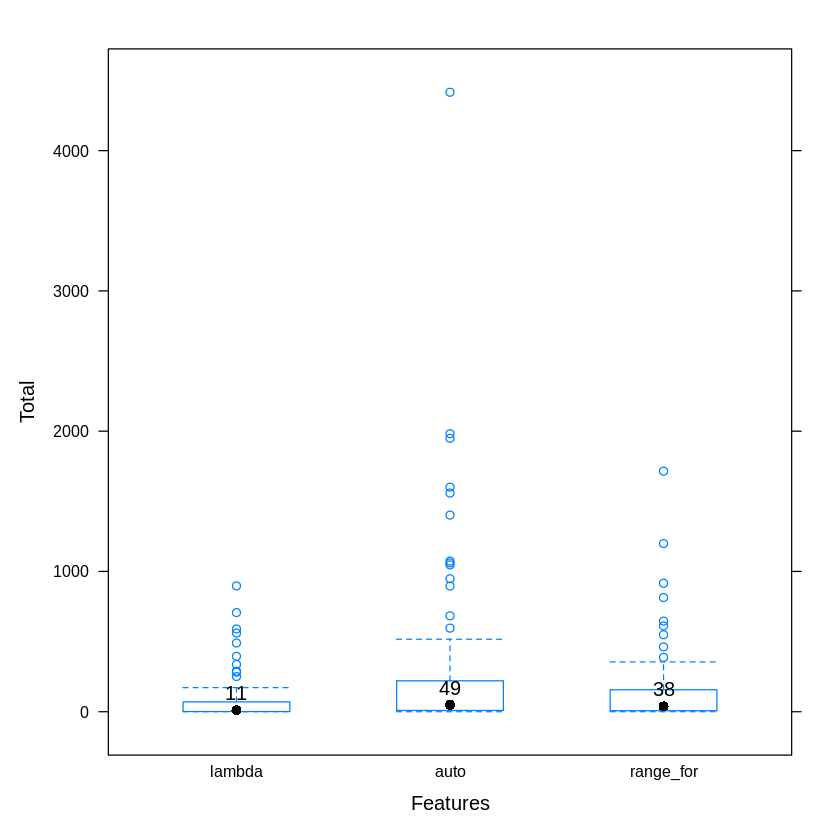

In [4]:
### Research Question 1

rq1 <- sqldf("select ds.project, date, lambda, auto, range_for, if_with_initializer,          
                      thread_declarations,future_declarations, const_expr,
                      shared_future_declarations,promise_declarations,async,statements,files
              from ds, projects p
              where ds.project = p.project
                and ds.date = p.last_revision", method = "name__class")

rq1 <- melt(rq1, id.vars=c("project", "date", "statements", "files"), value.name = "total", variable.name="feature")

# colnames(rq1)

rq5 <- sqldf("select project, feature, total
                      from rq1 
                      where feature in ('auto','lambda', 'range_for')
                      order by 2")

pdf("distribution.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")

bwplot(total~feature,data=rq5,xlab="Features",ylab="Total")

dev.off()

bwplot(total~feature,data=rq5,xlab="Features",ylab="Total", md = tapply(rq5$total, rq5$feature, median),
       panel = function(x, y, md, ...) {
         panel.bwplot(x, y, ...)
         panel.text(x = 1:4, y = md, labels = round(md, 2), pos = 3)
       })

rq5%>%
group_by(feature)%>% 
summarise(Mean=mean(total), Max=max(total), Min=min(total), Median=median(total), Std=sd(total))

sqldf("select feature, sum(total)
       from rq1 
       group by feature 
       order by 1")

rq1_summary <- sqldf("select feature, (100*count(distinct project))/99.0 percentage
                      from rq1 
                      where total > 0 
                      group by feature", method = "name__class")

rq1_summary

In [5]:
rq6 <- sqldf("select project, feature, statements, files, total
                      from rq1 
                      where feature in ('auto','lambda', 'range_for')
                      order by 2")

rq6%>%
group_by(feature)%>% 
summarise(cor1=cor(statements,total,method="spearman"), cor2=cor(files,total,method="spearman"))

feature,cor1,cor2
<fct>,<dbl>,<dbl>
lambda,0.5329455,0.6110828
auto,0.5273722,0.5959031
range_for,0.5545789,0.5911069


In [6]:
cd <- as.Date("2010-01-01")
maxDate <- as.Date("2022-05-01")

accm = ds[FALSE,]
nrow(accm)
while(cd < maxDate) {
  lastCommit <- fn$sqldf("select project, max(date) as date
                       from ds 
                       where date < '$cd'
                       group by project");
  
  
  
  monthYear = format(cd, "%Y-%m");
  
  snapshot <- fn$sqldf("select ds.*, '$monthYear' as monthYear
                        from ds, lastCommit lc
                        where ds.project = lc.project 
                          and ds.date = lc.date");
  
  
  accm <- rbind(accm, snapshot);
  
  # cd <- cd + 7;
  cd <- ymd(cd %m+% months(1))
}

rq2 <- sqldf("select project, monthYear, lambda, auto, range_for, if_with_initializer,          
                      thread_declarations,future_declarations,decl_type,const_expr,
                      shared_future_declarations,promise_declarations,async
              from accm")

sqldf("select count(distinct project) from accm")

rq2 <- melt(rq2, id.vars=c("project", "monthYear"), value.name = "total", variable.name="feature")


sqldf("select feature, min(monthYear)
       from rq2
       where total > 0
       group by feature")

[1] 0

count(distinct project)
<int>
99


feature,min(monthYear)
<fct>,<chr>
auto,2011-12
const_expr,2012-11
decl_type,2013-07
if_with_initializer,2020-05
lambda,2012-08
range_for,2011-12
thread_declarations,2018-05


In [7]:
ts <- sqldf("select feature, monthYear, sum(total) total
       from rq2 
       group by feature, monthYear 
       order by 1,2")

ts$monthYear = as.Date(paste(ts$monthYear,"-01",sep=""))

# Customizing the output
pdf("lambda.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'lambda',], type = "l")
dev.off()

# Customizing the output
pdf("auto.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'auto',], type = "l")
dev.off()

# # Customizing the output
# pdf("decl_type.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")
# xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'decl_type',], type = "l")
# dev.off()


png 
  2

png 
  2

In [8]:
pdf("range_for.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'range_for',], type = "l")
dev.off()

# pdf("const_expr.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")
# xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'const_expr',], type = "l")
# dev.off()

# pdf("if_with_initializer.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")
# xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'if_with_initializer',], type = "l")
# dev.off()

png 
  2

In [9]:
# Customizing the output

# ts <- sqldf("select feature, monthYear, sum(total) total
#        from rq2
#         where feature in ('auto','lambda','range_for')
#        group by feature, monthYear
#        order by 1,2")

# ts$monthYear = as.Date(paste(ts$monthYear,"-01",sep=""))


# pdf("features.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")
# xyplot(total ~ monthYear | feature, data=ts, type = "l")
# dev.off()


png 
  2